In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

# Prep data

In [2]:
weights_path = "data/eccco_is_lw_forwardmodel_thermal_response_psf4pix_el.fits"
weights_hdul = fits.open(weights_path)
weights = weights_hdul[0].data

weights.shape

(2048, 5491)

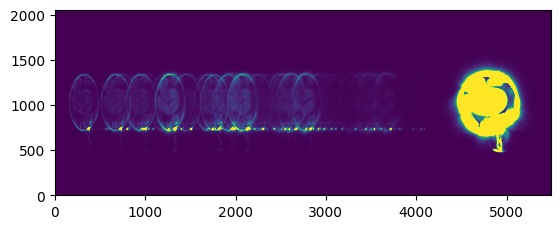

In [3]:
fig, ax = plt.subplots()
ax.imshow(weights, origin='lower', vmin=0, vmax=5000)

In [4]:
response_path = "data/D16Feb2024_eccco_response_feldman_m_el_with_tables_s_i_lw_coopersun.fits"
response_hdul = fits.open(response_path)
response = response_hdul[0].data

response.shape

(21, 1395, 5491)

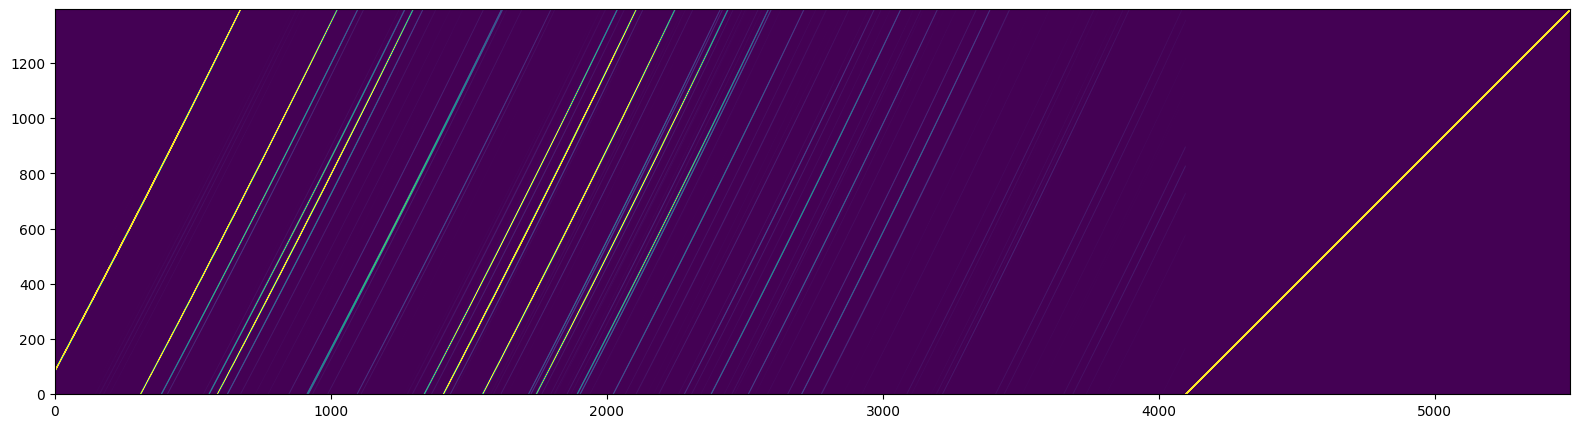

In [6]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.imshow(response[4], vmin=0, vmax=1, origin='lower')

In [7]:
forwardmodel_path = "data/eccco_is_lw_forwardmodel_thermal_response_psf4pix_el.fits"
forwardmodel_hdul = fits.open(forwardmodel_path)
forwardmodel = forwardmodel_hdul[0].data
forwardmodel.shape

(2048, 5491)

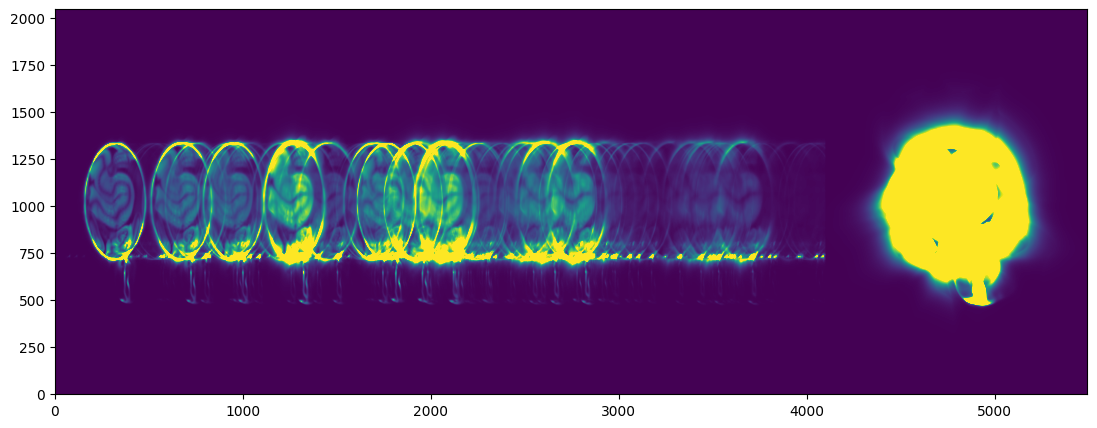

In [8]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.imshow(forwardmodel, vmin=0, vmax=1000, origin='lower')

In [9]:
img_x_low = 4096
norm_factor = np.nanpercentile(forwardmodel[:, img_x_low:], 99) / 1000
print(f"norm_factor = {norm_factor}")

norm_factor = 50.82221268627825


In [10]:
forwardmodel_img_norm = forwardmodel.copy()
forwardmodel_img_norm[:, img_x_low:] /= norm_factor

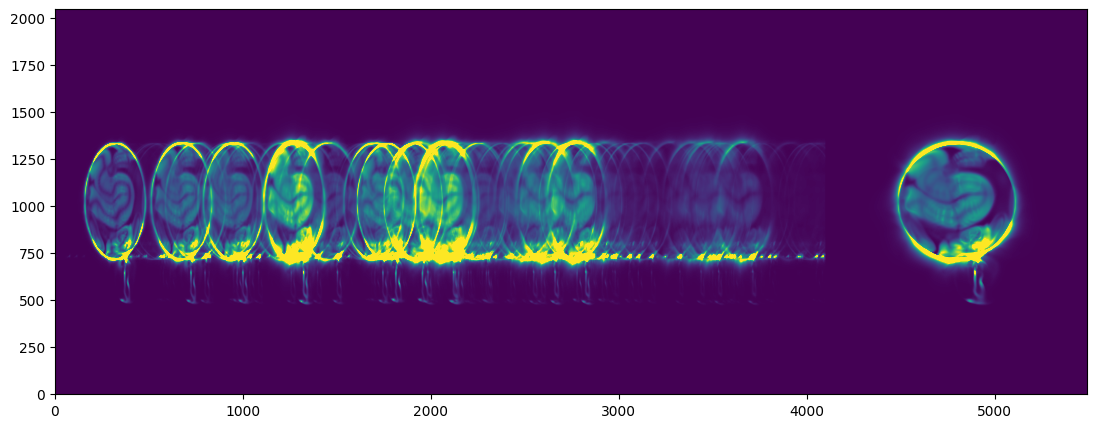

In [11]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.imshow(forwardmodel_img_norm, vmin=0, vmax=1000, origin='lower')

In [12]:
response.shape

(21, 1395, 5491)

In [13]:
response_img_norm = response.copy()
response_img_norm[:, :, img_x_low:] /= norm_factor

weights_img_norm = weights.copy()
#weights_img_norm = np.ones_like(weights_img_norm)
weights_img_norm[:, img_x_low:] /= norm_factor

In [14]:
response_img_norm.shape

(21, 1395, 5491)

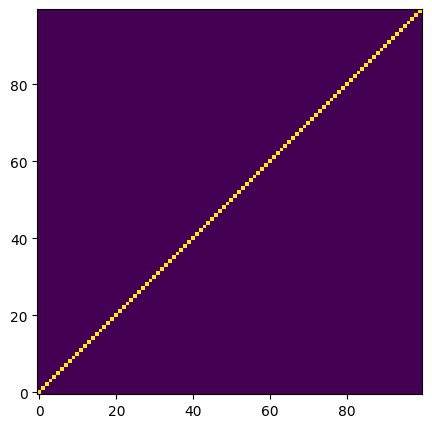

In [15]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.imshow(response_img_norm[0, :, img_x_low:][:100, :100], vmin=0, vmax=1, origin='lower')

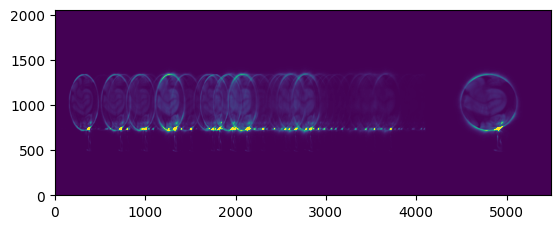

In [16]:
fig, ax = plt.subplots()
ax.imshow(weights_img_norm, origin='lower', vmin=0, vmax=5000)

In [17]:
response_hdul_img_norm = response_hdul.copy() 
response_hdul_img_norm[0].data = response_img_norm
response_hdul_img_norm.writeto("data/response_img_normalized.fits", overwrite=True)
fits.writeto("data/forwardmodel_img_normalized.fits", forwardmodel_img_norm, header=forwardmodel_hdul[0].header, overwrite=True)
fits.writeto("data/weights_img_normalized.fits", weights_img_norm, header=weights_hdul[0].header, overwrite=True)
fits.writeto("data/weights_uniform.fits", np.ones_like(weights_img_norm), header=weights_hdul[0].header, overwrite=True)


# Results

In [248]:
input = ""
original_path = "output/original/eccco_is_lw_forwardmodel_thermal_response_psf4pix_el_em_data_cube_x2_1.0_5_wpsf.fits"
img_norm_path = "output/img_norm/forwardmodel_img_normalized_em_data_cube_x2_1.0_5_wpsf.fits"
uniform_weights_path = "output/uniform_weights/eccco_is_lw_forwardmodel_thermal_response_psf4pix_el_em_data_cube_x2_1.0_5_wpsf.fits"

In [266]:
predicted_data_path = "output/uniform_weights/eccco_is_lw_forwardmodel_thermal_response_psf4pix_el_model_predicted_data_x2_1.0_5_wpsf.fits"
predicted_data = fits.getdata(predicted_data_path)
score = fits.getdata("output/uniform_weights/eccco_is_lw_forwardmodel_thermal_response_psf4pix_el_model_score_data_x2_1.0_5_wpsf.fits")
original_predicted = fits.getdata("output/original/eccco_is_lw_forwardmodel_thermal_response_psf4pix_el_model_predicted_data_x2_1.0_5_wpsf.fits")

In [249]:
original_data = fits.getdata(original_path)
img_norm_data = fits.getdata(img_norm_path)
uniform_weights_data = fits.getdata(uniform_weights_path)

In [250]:
np.allclose(img_norm_data, 0)

False

In [251]:
img_norm_data.shape

(19, 2048, 697)

In [270]:
np.min(np.sum(img_norm_data, axis=0)), np.max(np.sum(img_norm_data, axis=0))

(0.0, 0.00027143082)

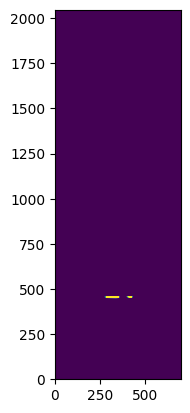

In [272]:
fig, ax = plt.subplots()
ax.imshow(np.sum(img_norm_data, axis=0), vmin=0, vmax=0.00001, origin='lower')


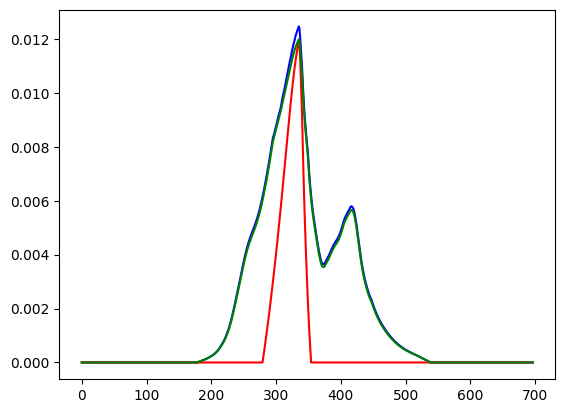

In [253]:
fig, ax = plt.subplots()
ax.plot(original_data[4, 450, :], 'b')
ax.plot(img_norm_data[4, 450, :]*norm_factor, 'r')
ax.plot(uniform_weights_data[4, 450, :], 'g')

In [254]:
uniform_weights_data.shape

(19, 2048, 697)

In [256]:
predicted_data.shape

(2048, 5491)

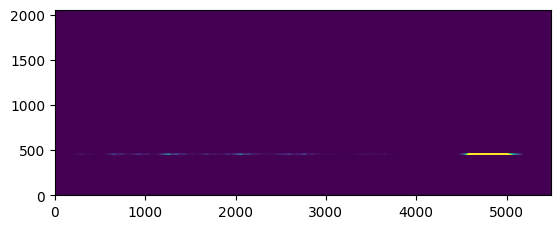

In [261]:
fig, ax = plt.subplots()
ax.imshow(predicted_data, vmin=0, vmax=1, origin="lower")

In [263]:
score.shape

(2048, 1)

In [265]:
score[450:456]

array([[0.99669933],
       [0.9968002 ],
       [0.99689406],
       [0.9969783 ],
       [0.99705404],
       [0.9971182 ]], dtype='>f4')

# inspect spectra only

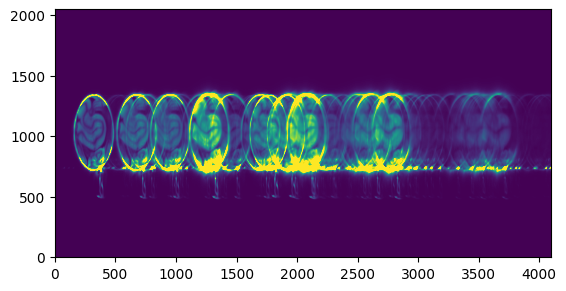

In [279]:
img = fits.getdata("data/forward_model_only_spectra.fits")
fig, ax = plt.subplots()
ax.imshow(img, vmin=0, vmax=1000, origin="lower")

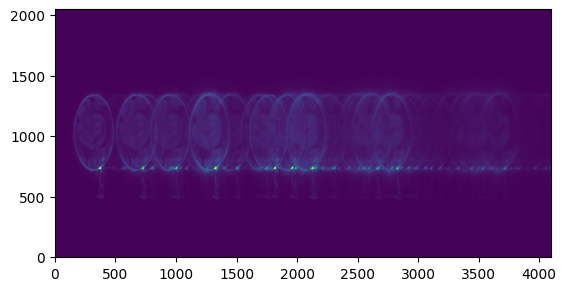

In [280]:
img = fits.getdata("data/weights_only_spectra.fits")
fig, ax = plt.subplots()
ax.imshow(img, vmin=0, vmax=1000, origin="lower")

(21, 1395, 4096)


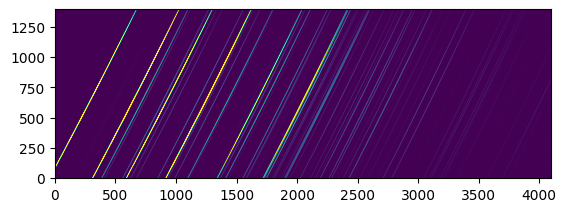

In [282]:
cube = fits.getdata("data/response_only_spectra.fits")
print(cube.shape)
fig, ax = plt.subplots()
ax.imshow(cube[5], vmin=0, vmax=1, origin='lower')